In [23]:
import os
import numpy as np
from skimage.io import imread
from glob import glob
import matplotlib.pyplot as plt
from skimage.util import invert
import skimage.color as color
import torch
import torch.nn as nn
from imgaug import augmenters as iaa
from data import default_loader_custom

In [30]:
def load_pic(path):
    pic = imread(path)
    class_name = get_class(path)
    if class_name == "malaria":
        print("MALARIA:",pic.shape)
        pic = color.rgb2grey(pic)
        print("AFTER 2GREY: ",pic.shape)
        pic = invert(pic)
    elif class_name == "Human_HT29_colon-cancer" or class_name == "dna":
        #pic = color.rgb2grey(pic)
        pass
    elif class_name == "dp":
        pic = color.rgba2rgb(pic)
        pic = color.rgb2grey(pic)
        
    if (pic.dtype == 'uint16'):
        #print("anything else than double!!")
        if (pic.max()<32768):
            pic = pic.astype('int16')
        else:
            pic = pic.astype('int32')
    if (False):
        pic = pic.astype('float')


    #if (len(pic.shape)==2):
        #pic = pic.reshape((pic.shape[0], pic.shape[1],1))
        #pic = np.repeat(pic, 3, axis=-1)
    if (pic.shape[0]==3):
        #print("**************3 IS BACK: ",pic.shape)
        pic = pic.transpose() #Not sure this is correct to get from (y,x,3) to (3,y,x)
    
    #==========RESHAPING=============
    shorter_side = min(pic.shape[0], pic.shape[1])
    if (class_name == "Hela"):
        shorter_side = shorter_side//8
    if (class_name == "mSar"):
        shorter_side = shorter_side//6
    if (class_name == "malaria"):
        shorter_side = shorter_side//4
    if (class_name == "Human_Hepatocyte_Murine_Fibroblast"):
        shorter_side = int(shorter_side/2)
    scale = iaa.Resize({"shorter-side":shorter_side, "longer-side":"keep-aspect-ratio"}).augment_image
    pic = scale(pic)
         
    #===========CROP==================    
    crop = iaa.CropToFixedSize(width=256, height=256).augment_image
    pic  = crop(pic)
    #==========TO [0,1]=============
    pic = pic/pic.max()
    
    return pic

def get_class(path):
    return path.split('/')[-2]

In [25]:
def load(path):
    pic = default_loader_custom(path)
    #===========CROP==================    
    crop = iaa.CropToFixedSize(width=256, height=256).augment_image
    pic  = crop(pic)
    #==========TO [0,1]=============
    pic = pic/pic.max()
    
    return pic

In [26]:
def getImgs(pth, dataType):
    return glob(os.path.join(pth, dataType))

dir_path = "../../../scratch/bunk/cell2cell/test/A"
classes = next(os.walk(dir_path))[1]
pth_list = []

for cls in classes:
    cls_pth = os.path.join(dir_path, cls)
    cls_imgs = getImgs(cls_pth, "*.TIF") + getImgs(cls_pth, "*.png") + getImgs(cls_pth, "*.jpg") + getImgs(cls_pth, "*.tif")
    pth_list.append(cls_imgs)

print(len(pth_list))

8


Class 1 :  Hela
(256, 256)
Class 2 :  synthetic_BBBC004
(256, 256)
Class 3 :  Human_USOS_P_20585
(256, 256)
Class 4 :  malaria
MALARIA: (1200, 1600, 3)
AFTER 2GREY:  (1200, 1600)
(256, 256)
Class 5 :  dp
(256, 256)
Class 6 :  mSar
(256, 256)
Class 7 :  Human_HT29_Colon_Cancer_DNA
(256, 256)
Class 8 :  Human_Hepatocyte_Murine_Fibroblast
(256, 256)


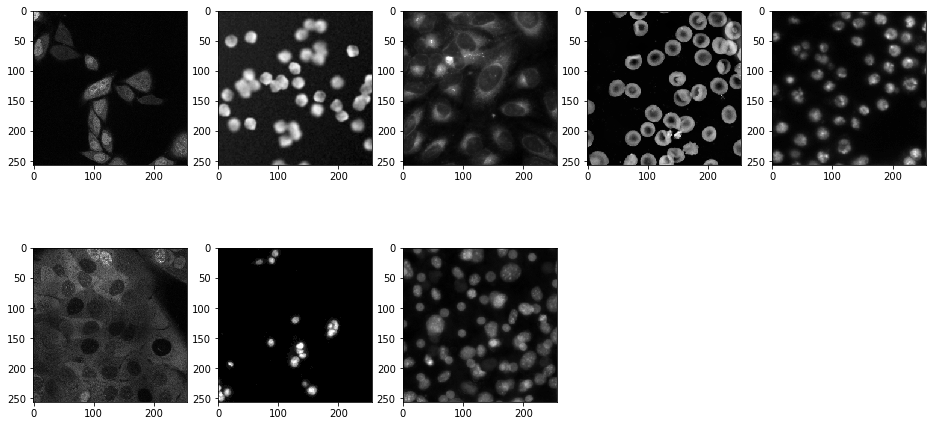

In [31]:
fig=plt.figure(figsize=(16, 8))
index = 35
columns = 5
rows = 2
j = 0
for i in range(1, columns*rows +1):
    if j>= len(pth_list):
        break
    print("Class", j+1,": ",classes[j])
    img = load_pic(pth_list[j][index])
    #img = img.transpose()
    #img = img[2]
    print(img.shape)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap="gray")
    j+=1
plt.show()

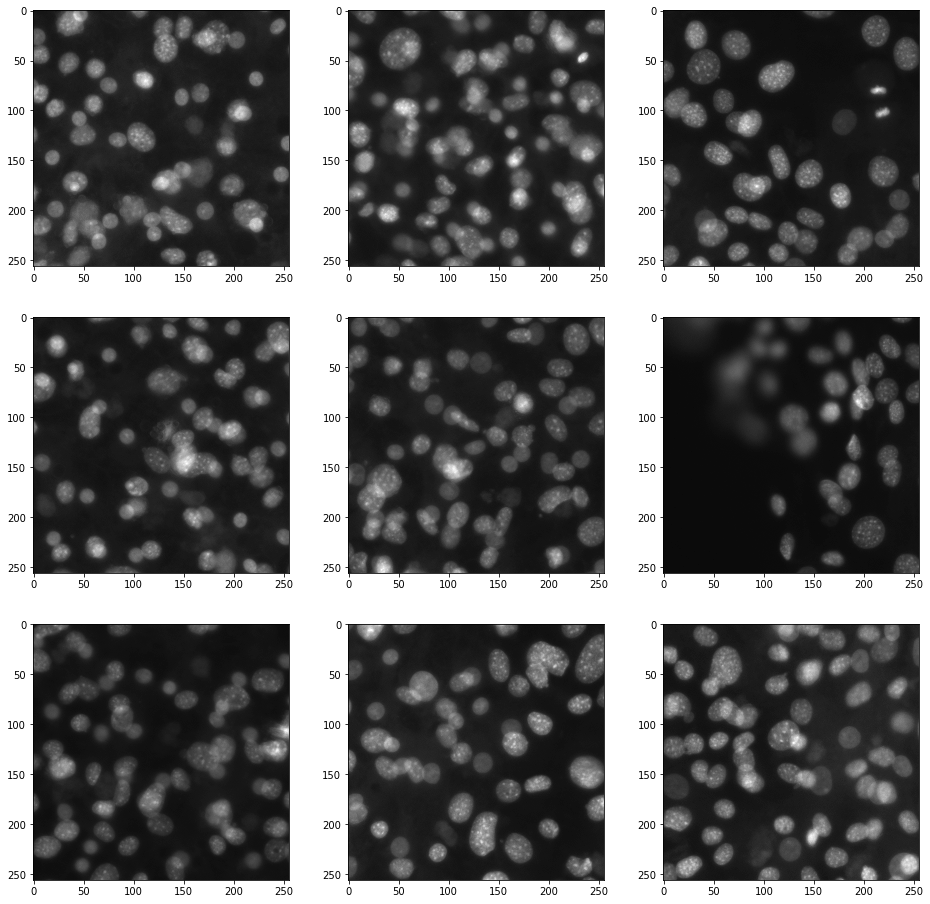

In [150]:
fig=plt.figure(figsize=(16, 16))
index = 6
columns = 3
rows = 3
j = 0
for i in range(1, columns*rows +1):
    img = load_pic(pth_list[7][j+10])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    j+=1
plt.show()

In [53]:
dir_path = "../../../scratch/bunk/cell2cell/test/A"
fol1 = "malaria"
fol2 = "Human_HT29_colon-cancer"
fol3 = "Hela"
fol4 = "dp"

impath_malaria = os.path.join(dir_path, fol1)
impath_malaria = os.path.join(impath_malaria, "*.png")
imlist_malaria = glob(impath_malaria)

impath_colon = os.path.join(dir_path, fol2)
impath_colon = os.path.join(impath_colon, "*.DIB")
imlist_colon = glob(impath_colon)

impath_hela = os.path.join(dir_path, fol3)
impath_hela = os.path.join(impath_hela, "*.tif")
imlist_hela = glob(impath_hela)

impath_dp = os.path.join(dir_path, fol4)
impath_dp = os.path.join(impath_dp, "*.png")
imlist_dp = glob(impath_dp)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def two2three(pic):
    if (len(pic.shape)==2):
        print(pic.shape)
        pic = pic.reshape((pic.shape[0], pic.shape[1],1))
        pic = np.repeat(pic, 3, axis=-1)
    if (pic.shape[0]==3):
        #print("**************3 IS BACK: ",pic.shape)
        pic = pic.transpose() #Not sure this is correct to get from (y,x,3) to (3,y,x)
    return pic

input arr shape:  (256, 256, 4)
(256, 256, 4)


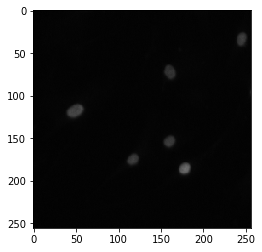

In [4]:
arr = imread(imlist_dp[16])
print("input arr shape: ",arr.shape)
#arr = ski.rgba2rgb(arr)
#arr = ski.rgb2grey(arr)
#arr = two2three(arr)
print(arr.shape)
plt.imshow(arr)

In [5]:
arr = imread(imlist_malaria[0])
print("input arr shape: ",arr.shape)
arr = ski.rgba2rgb(arr)
arr = ski.rgb2grey(arr)
arr = invert(arr)
arr = two2three(arr)
print(arr.shape)
plt.imshow(arr)

input arr shape:  (1200, 1600, 3)


ValueError: the input array must have a shape == (.., ..,[ ..,] 4)), got (1200, 1600, 3)

input arr shape:  (1600, 1200)
(1600, 1200)


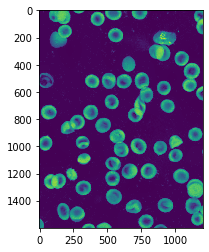

In [6]:
arr = imread(imlist_malaria[0])
arr = (arr.transpose())[0]
print("input arr shape: ",arr.shape)
arr = ski.rgb2grey(arr)
arr = invert(arr)
print(arr.shape)
plt.imshow(arr)

input arr shape:  (512, 512, 3)
(512, 512)
(512, 512, 3)


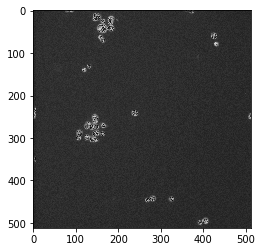

In [7]:
arr = imread(imlist_colon[0])
print("input arr shape: ",arr.shape)
arr = ski.rgb2grey(arr)
#arr = invert(arr)
arr = two2three(arr)
print(arr.shape)
plt.imshow(arr)

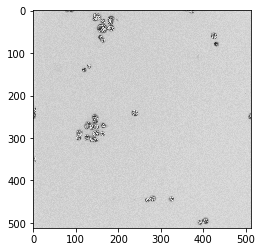

In [8]:
arr = invert(arr)
plt.imshow(arr)

In [9]:
class PrintLayer(nn.Module):
    def __init__(self, index, fig, **kwargs):
        super().__init__(**kwargs)
        self.index = index
        self.fig = fig

    def forward(self, x):
        y=x.detach().cpu().numpy().reshape(512,512,6)
        y1 = y[::1, ::1, 0:3:1]
        y2 = y[::1, ::1, 3:6:1]
        self.fig.add_subplot(4, 4, self.index)
        plt.imshow(y1)
        self.fig.add_subplot(4, 4, self.index+1)
        plt.imshow(y2)
        return x

In [10]:
class TestNet(nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TestNet, self).__init__()
        
        self.fig=plt.figure(figsize=(16, 16))
    
        
        model = [
            nn.Flatten(start_dim=0, end_dim=1),
            nn.Linear(D_in, H),
            PrintLayer(1, self.fig),
            nn.ReLU(inplace=True),
            PrintLayer(3, self.fig),
            nn.Linear(H, D_out),
            #PrintLayer(5, self.fig)
        ]
        
        self.model = nn.Sequential(*model
        )

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        y = self.model(x)
        y = y.reshape(x.shape)
        return y

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 2)
DONE
torch.Size([512, 512, 3])
torch.Size([512, 512, 3])


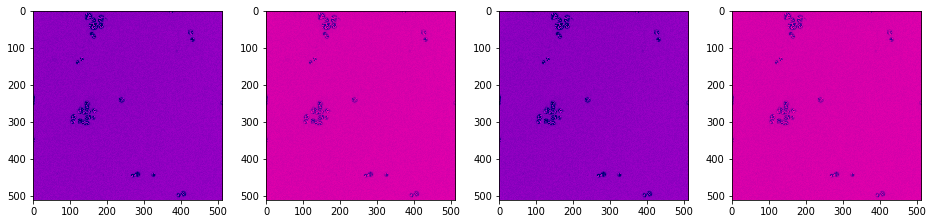

In [11]:
net = TestNet(3, 6, 3)
test = arr
print(arr[::1, ::1, 0:2:1].shape)
print("DONE")
test = torch.Tensor(test)
print(test.shape)
y = net(test)
print(y.shape)
plt.show()

In [3]:
import blocks
import torch
from torch import nn

In [1]:
import blocks
import torch
from torch import nn
x = blocks.InceptionBlock(3, 100, 3, 1)
z = blocks.Conv2dBlock(3,100,3,1)
y = torch.ones((2, 3,12,12))
res = x(y)
print(res.shape)
res2 = z(y)
print(res2.shape)

BLOCKS, INCEPTIONBLOCK: BE AWARE THAT THE CONV2DBLOCK DIDN'T PAD AS MUCH AS THIS ONE
l shape torch.Size([2, 12, 12, 12])
r shape torch.Size([2, 13, 12, 12])
torch.Size([2, 100, 12, 12])
torch.Size([2, 100, 10, 10])


In [2]:
import utils
from globalConstants import GlobalConstants

In [4]:
GlobalConstants.setPrecision("float16_apex")
bs = 4
train_content_loader = utils.create_loader(".",
                            "../../../scratch/bunk/cell2cell/test/A",
                            10,
                            10,
                            desired_size=256,
                            resize_shorter_side=300,
                            num_classes=8,
                            batch_size=bs)
train_class_loader = utils.create_loader(".",
                            "../../../scratch/bunk/cell2cell/test/A",
                            10,
                            10,
                            desired_size=256,
                            resize_shorter_side=300,
                            num_classes=8,
                            batch_size=bs,
                            num_workers=0)

Using APEX
Set precision to: torch.float16
Data loader
	Root: .
	Number of images: 1975
	Classes:  ['Hela', 'synthetic_BBBC004', 'Human_USOS_P_20585', 'malaria', 'dp', 'mSar', 'Human_HT29_Colon_Cancer_DNA', 'Human_Hepatocyte_Murine_Fibroblast']
	Number of classes: 8
Data loader
	Root: .
	Number of images: 1975
	Classes:  ['Hela', 'synthetic_BBBC004', 'Human_USOS_P_20585', 'malaria', 'dp', 'mSar', 'Human_HT29_Colon_Cancer_DNA', 'Human_Hepatocyte_Murine_Fibroblast']
	Number of classes: 8


torch.Size([4, 3, 256, 256])
torch.Size([4, 3, 256, 256])


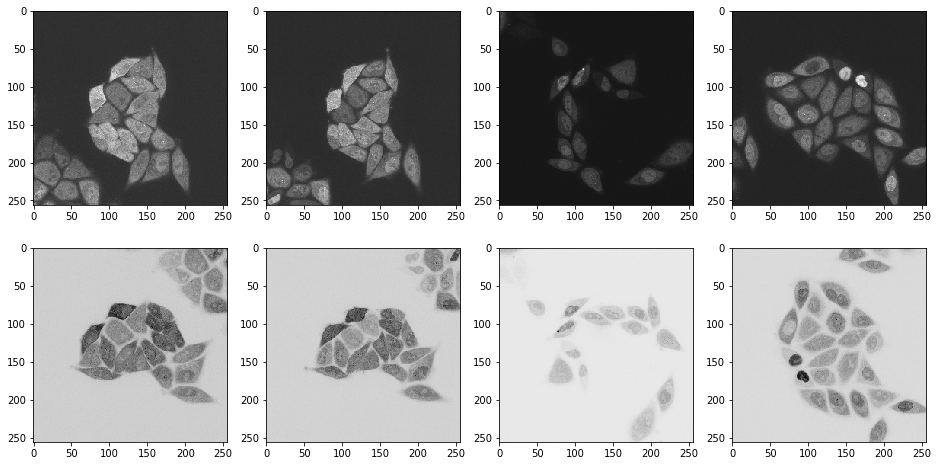

In [26]:
#torch.manual_seed(10000)
    torch.backends.cudnn.deterministic = True
for it, (co_data, cl_data) in enumerate(zip(train_content_loader, train_class_loader)):
    fig=plt.figure(figsize=(16, 8))
    columns = 4
    rows = 2
    j = 0
    print(co_data[0].shape)
    print(cl_data[0].shape)
    for run in range(2):
        if run == 0:
            data = co_data[0]
        else:
            data = cl_data[0]
            for y in range(len(data)):
                data[y] = -1*data[y].transpose(1,2) +1
        for i in range(1, bs+1):
            fig.add_subplot(rows,columns, i+bs*run)
            img = data[i-1]
            img = img.transpose(0, 2)
            plt.imshow(img)
    plt.show()
    """
    for i in range(1, columns*rows +1):
        if j>= len(pth_list):
            break
        print("Class", j+1,": ",classes[j])
        img = load_pic(pth_list[j][index])
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()
    """
    j+=1
    break

In [ ]:
for run in range(2):
    if run == 0:
        data = co_data[0]
    else:
        data = cl_data[0]
    for i in range(1, bs+1):